In [1]:
# import required packages

# source: https://www.kaggle.com/allunia/patterns-of-colorectal-cancer-wally

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set(style='darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('../01_Data_Files/hmnist_64_64_L.csv', engine='c') # read 64x64 gray scale images as csv

In [3]:
df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,134,99,119,130,142,169,152,139,117,87,...,112,89,73,100,120,120,126,140,195,2
1,55,64,74,63,74,75,71,73,70,77,...,79,85,86,77,68,66,65,68,69,2
2,114,116,136,152,132,100,151,150,127,205,...,128,157,159,205,182,143,129,89,122,2
3,86,82,88,85,103,93,98,109,104,115,...,79,80,109,128,89,85,80,63,48,2
4,168,143,140,139,129,123,123,141,137,101,...,231,199,183,195,179,134,142,158,149,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,154,159,165,162,155,155,144,141,154,167,...,139,104,126,134,119,123,135,140,144,3
4996,148,119,154,147,132,137,147,170,177,163,...,165,150,176,189,157,168,163,143,168,3
4997,30,29,37,60,66,93,91,90,78,81,...,230,231,229,226,175,172,195,83,45,3
4998,105,115,108,105,111,125,123,109,109,118,...,152,141,116,116,125,91,77,81,85,3


In [4]:
dict_class_names = {1: 'Tumor', 2:'Stroma', 3:'Complex', 4:'Lymphoma', 5:'Debris', 6:'Mucosa', 7:'Adipose', 8:'Empty'}
dict_class_counts = df.label.value_counts().to_dict()
dict_count_names = {}
for i in dict_class_counts.keys():
    dict_count_names[dict_class_names[i]] = dict_class_counts[i]


In [5]:
pd_class_counts = pd.Series(dict_count_names)

In [6]:
pd_class_counts

Adipose     625
Complex     625
Mucosa      625
Stroma      625
Debris      625
Tumor       625
Empty       625
Lymphoma    625
dtype: int64

## Describe the data

1. The data consists of 5000 Samples
2. The column 'label' in df indicates the class the sample belongs to. There are 8 classes in totol with an equal distribution of each class. 

In [23]:
fig = px.bar(pd_class_counts, labels={'index':'Label', 'value':'Count'})
fig.show() # Shows that the data is evenly distrubted

In [17]:
img_list_grouped_df = df.groupby('label').sample(n=1, random_state=42)

In [20]:
img_list_grouped = np.reshape(img_list_grouped_df.loc[:, img_list_grouped_df.columns != 'label'].values, (8,64,64))

In [24]:
img_list_grouped_df.reset_index()

,index,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,3572,31,59,82,33,36,52,48,50,74,...,48,40,71,73,82,54,177,225,212,1
1,444,167,156,193,217,151,110,114,150,166,...,156,180,182,165,140,107,106,105,140,2
2,4796,97,58,48,46,66,94,104,116,149,...,67,47,33,42,53,53,92,105,76,3
3,4015,45,34,26,24,22,17,18,20,22,...,26,48,96,80,69,55,26,27,53,4
4,688,239,239,240,240,240,238,231,225,223,...,183,155,160,94,101,103,92,158,175,5
5,2386,98,65,58,68,72,35,33,38,76,...,35,32,23,25,31,34,66,102,85,6
6,1480,242,244,244,244,244,244,244,243,242,...,242,245,245,243,243,243,245,244,242,7
7,2914,241,240,240,241,242,242,240,240,242,...,242,241,241,242,242,242,241,242,242,8


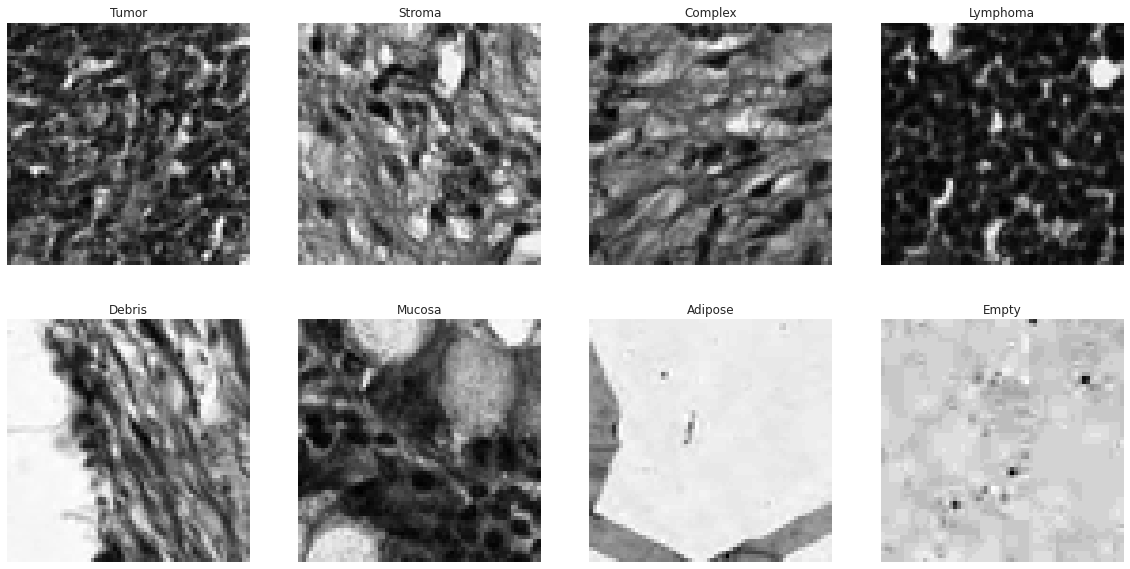

In [26]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,10))

counter = 0
for m in range(2):
    for n in range(4):
       
        axes[m, n].imshow(img_list_grouped[counter], cmap='gray')
        axes[m, n].set_title(dict_class_names[counter+1])
        axes[m, n].grid(False)
        axes[m, n].axis(False)

        counter += 1

In [27]:
dict_class_names.values()

dict_values(['Tumor', 'Stroma', 'Complex', 'Lymphoma', 'Debris', 'Mucosa', 'Adipose', 'Empty'])